## Importing dataset

In [3]:
import pandas as pd

df = pd.read_csv("./adult.csv")
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df["age"].nunique()

73

In [10]:
df["age"].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [11]:
df["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [12]:
df["native.country"].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [14]:
df["native.country"].replace("?","unknown", inplace=True)
df[df["native.country"]=="unknown"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,unknown,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,unknown,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,unknown,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,unknown,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,unknown,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,unknown,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,unknown,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,unknown,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,unknown,>50K


In [20]:
(df[df["native.country"]=="unknown"].shape[0]/df.shape[0])*100

1.7904855501980899

In [21]:
df["marital.status"].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

<Axes: xlabel='occupation'>

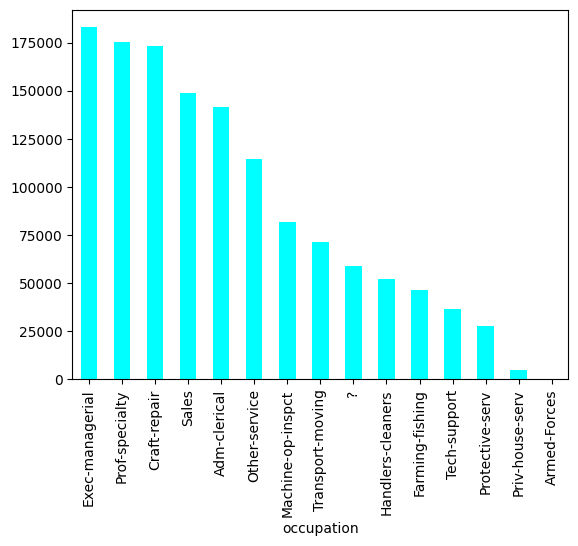

In [26]:
sum_hours_per_week_by_occupation = df.groupby(["occupation"])["hours.per.week"].sum().sort_values(ascending=False)
sum_hours_per_week_by_occupation.plot(kind="bar", color='cyan')

<Axes: ylabel='hours.per.week'>

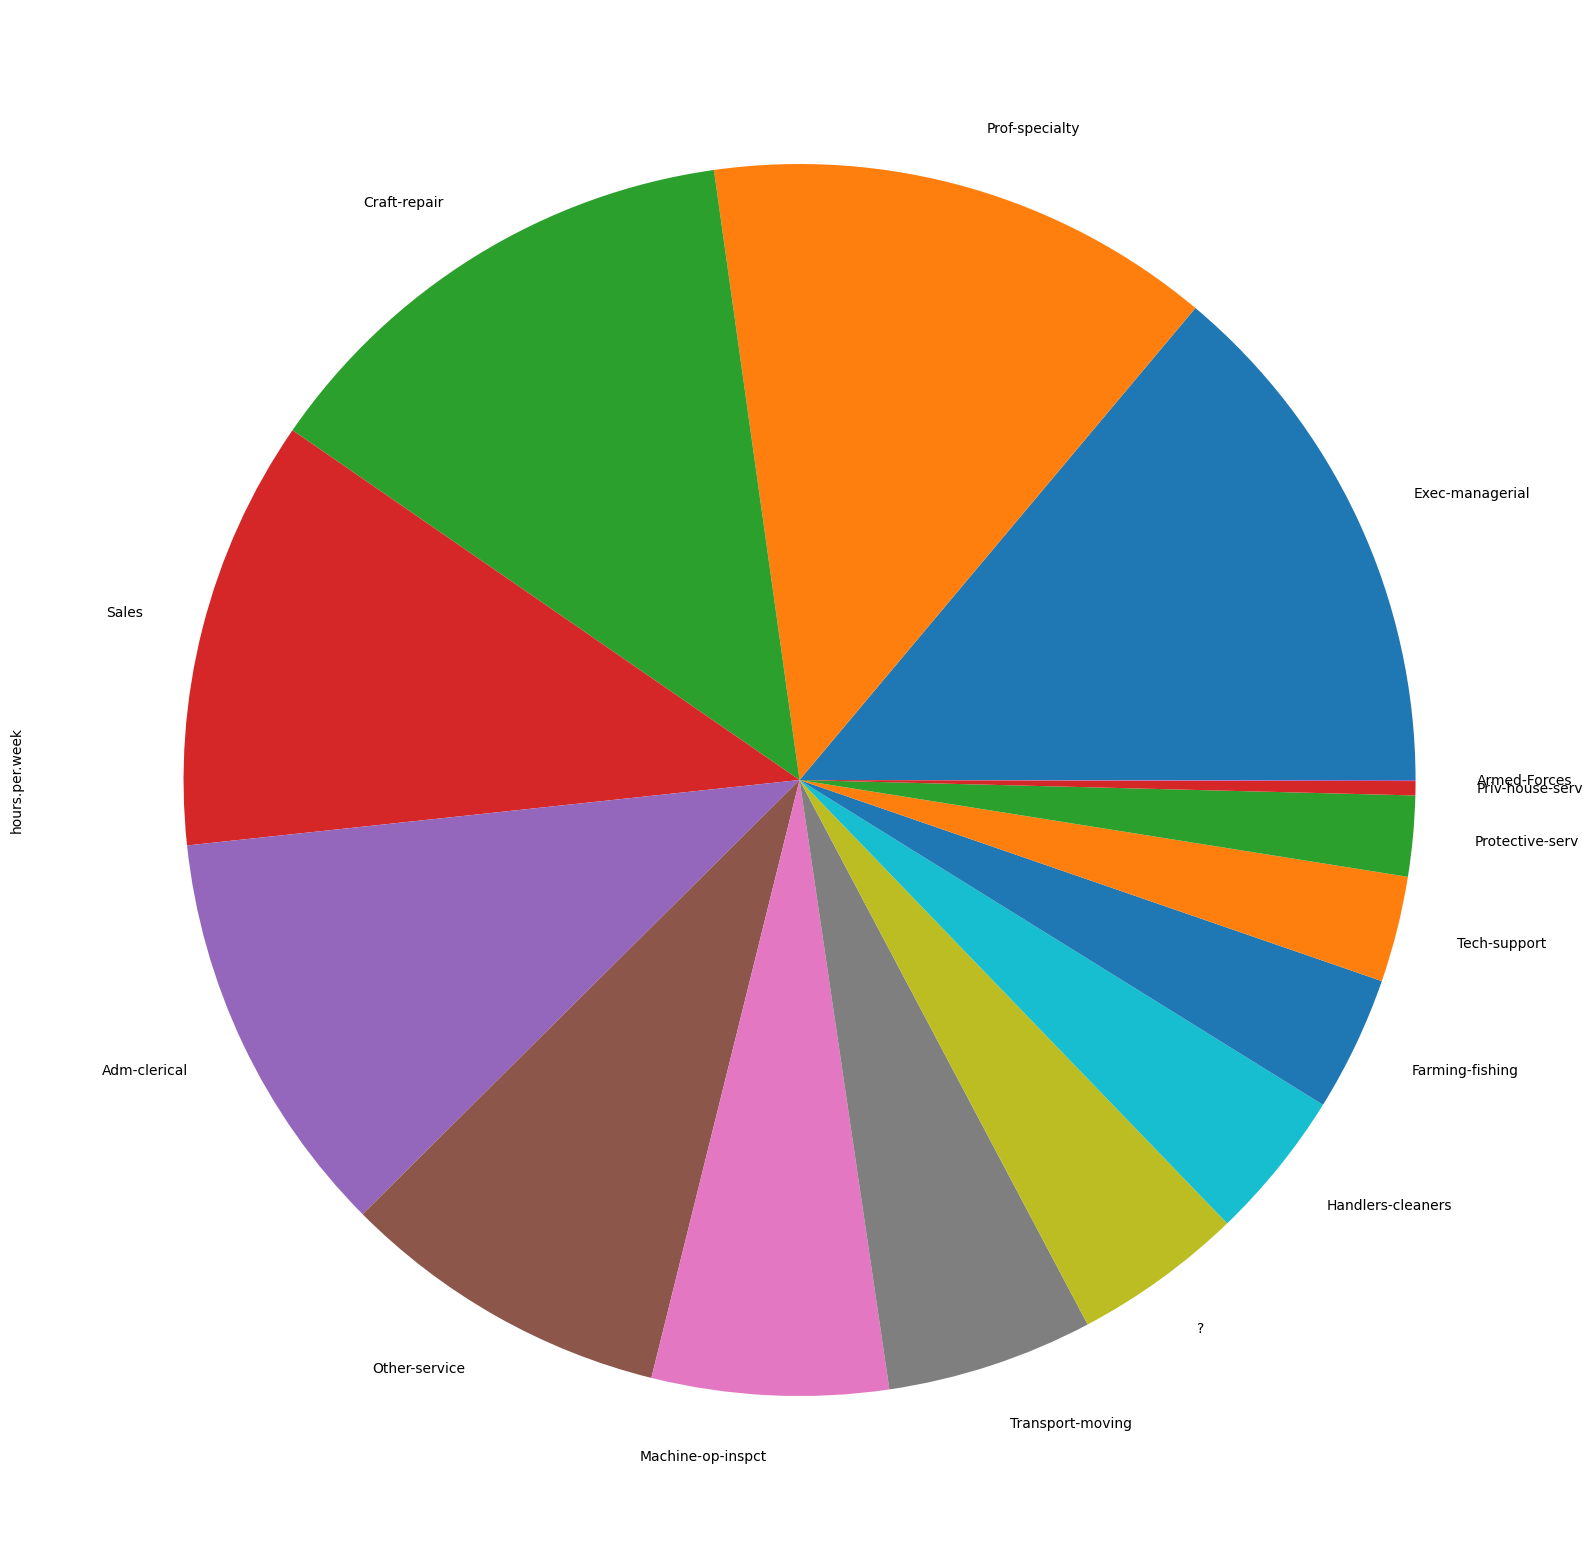

In [29]:
sum_hours_per_week_by_occupation.plot(kind="pie", figsize=(20,20))

<Axes: xlabel='sex,income', ylabel='count'>

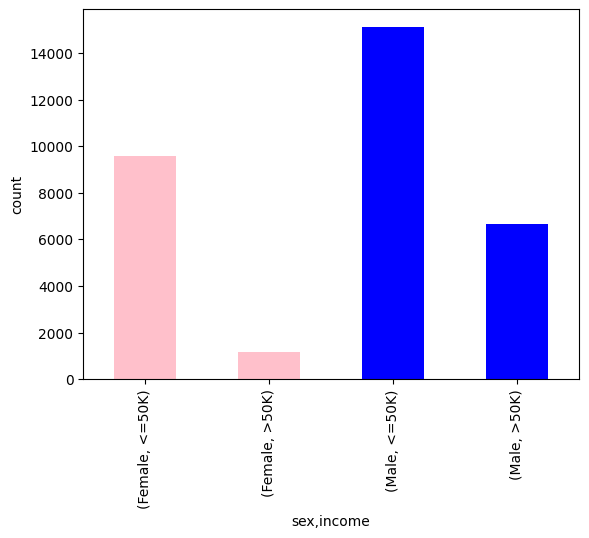

In [35]:
# Gender and salary

gender_and_salary = df.groupby("sex")["income"].value_counts()
gender_and_salary.plot(kind="bar", color=["pink", "pink", "blue","blue"], ylabel="count")